In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_v3.0.csv')

In [3]:
## Exploratory Data Analysis (EDA)

# Basic information about the dataset
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Movie Title              250 non-null    object 
 1   Released Year            250 non-null    int64  
 2   Duration                 250 non-null    object 
 3   Restrticted Rating       247 non-null    object 
 4   Rating (Star out of 10)  250 non-null    float64
 5   User Vote                250 non-null    object 
 6   Director (1)             250 non-null    object 
 7   Director (2)             26 non-null     object 
 8   Director (3)             4 non-null      object 
 9   Starring (1)             250 non-null    object 
 10  Starring (2)             250 non-null    object 
 11  Starring (3)             250 non-null    object 
 12  Synopsis                 250 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 25.5+ KB


,Released Year,Rating (Star out of 10)
count,250.000000,250.00000
mean,1987.576000,8.30920
std,25.459083,0.23481
min,1921.000000,8.00000
25%,1968.750000,8.10000
50%,1995.000000,8.20000
75%,2007.750000,8.40000
max,2024.000000,9.30000


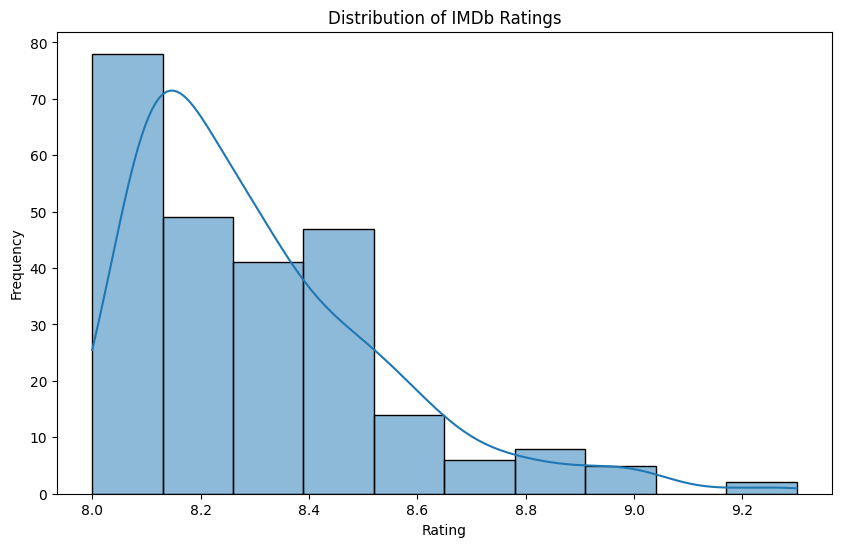

In [4]:
# Distribution of IMDb ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating (Star out of 10)'], bins=10, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

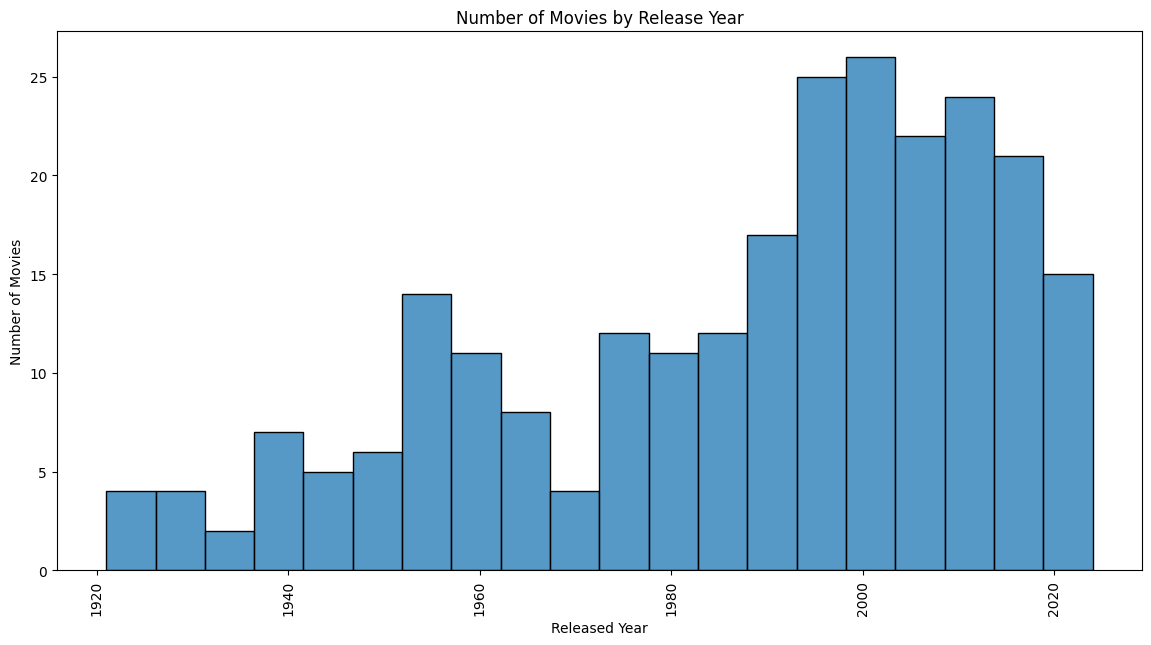

In [5]:
# Count of movies by release year
plt.figure(figsize=(14,7))
sns.histplot(data=df, x='Released Year', bins=20, kde=False)
plt.xticks(rotation=90)
plt.title('Number of Movies by Release Year')
plt.xlabel('Released Year')
plt.ylabel('Number of Movies')
plt.show()

In [6]:
# Convert 'Duration' to total minutes
def convert_duration(duration_str):
    if 'h' in duration_str and 'm' in duration_str:
        hours, minutes = duration_str.split('h')
        hours = int(hours.strip())
        minutes = int(minutes.strip().strip('m'))
        return hours * 60 + minutes
    elif 'h' in duration_str:
        hours = int(duration_str.strip().strip('h'))
        return hours * 60
    elif 'm' in duration_str:
        minutes = int(duration_str.strip().strip('m'))
        return minutes
    else:
        return None

# Apply the conversion function to the 'Duration' column
df['Duration'] = df['Duration'].apply(convert_duration)

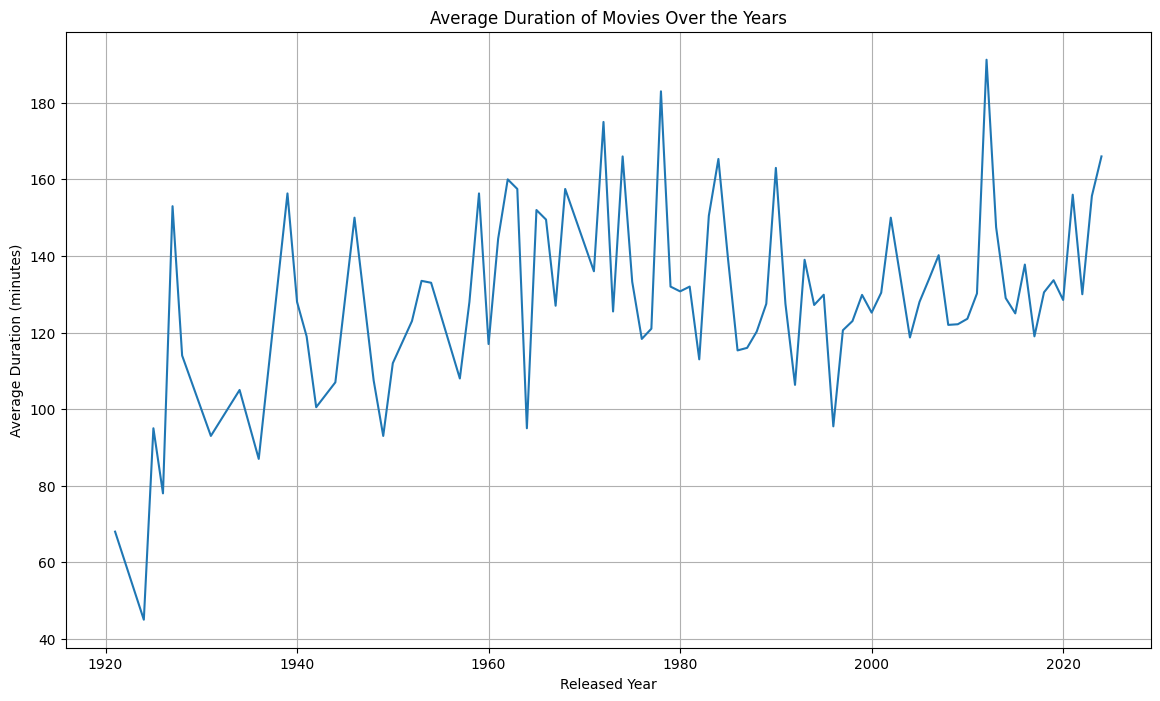

In [7]:
# Average duration of movies over the years using a line chart
plt.figure(figsize=(14, 8))
average_duration_by_year = df.groupby('Released Year')['Duration'].mean()
average_duration_by_year.plot(kind='line')
plt.title('Average Duration of Movies Over the Years')
plt.xlabel('Released Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()

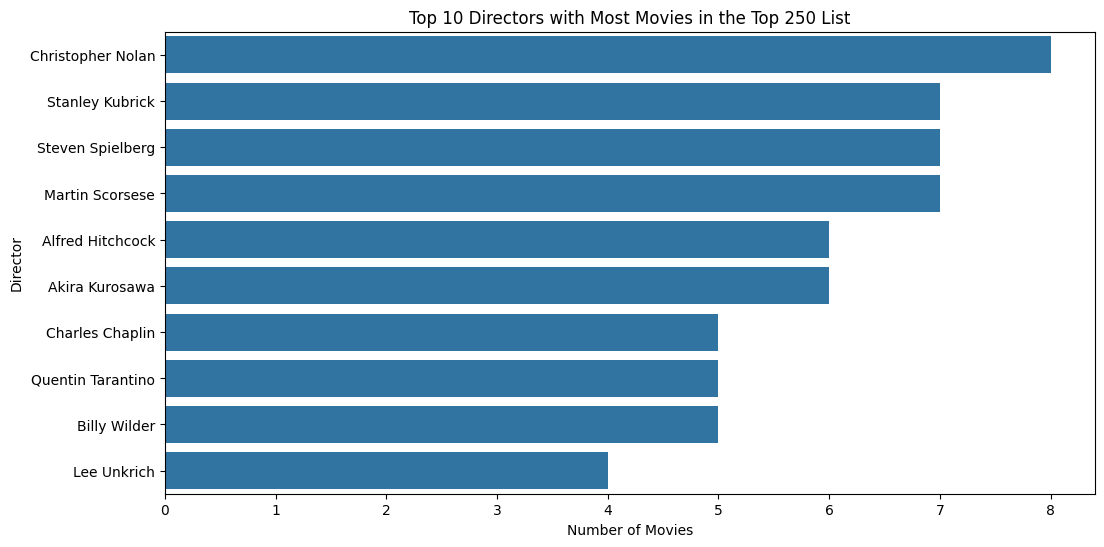

In [8]:
# Top 10 directors with the most movies in the Top 250 list
top_directors = pd.concat([df['Director (1)'], df['Director (2)'], df['Director (3)']])
top_directors = top_directors.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors with Most Movies in the Top 250 List')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

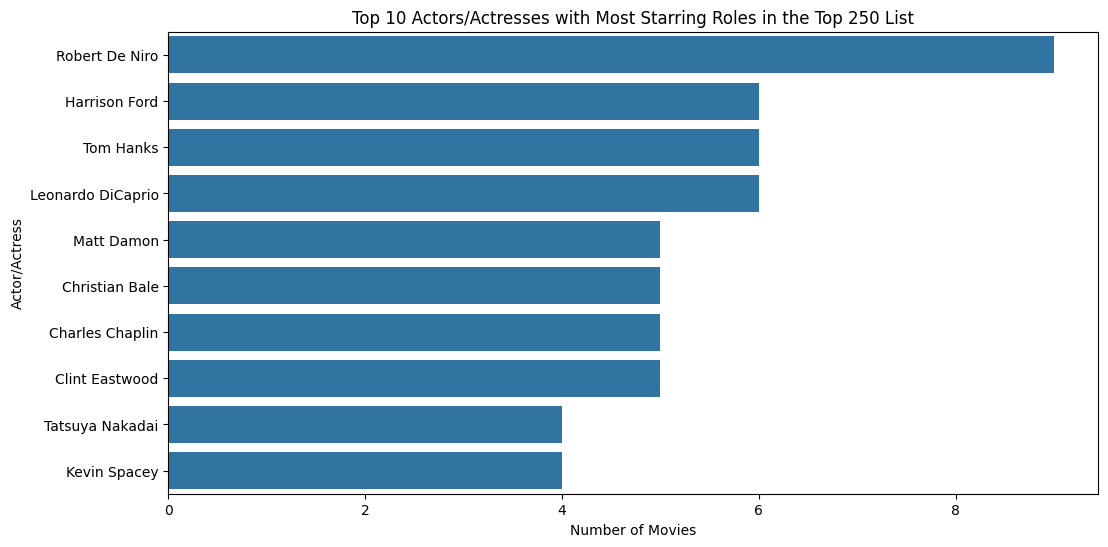

In [9]:
# Top 10 actors/actresses with the most starring roles in the Top 250 list
top_actors = pd.concat([df['Starring (1)'], df['Starring (2)'], df['Starring (3)']])
top_actors = top_actors.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title('Top 10 Actors/Actresses with Most Starring Roles in the Top 250 List')
plt.xlabel('Number of Movies')
plt.ylabel('Actor/Actress')
plt.show()

In [10]:
# Convert 'User Vote' to numeric (millions)
def convert_user_vote(vote_str):
    if 'M' in vote_str:
        return float(vote_str.replace('M', ''))
    elif 'K' in vote_str:
        return float(vote_str.replace('K', '')) / 1000
    else:
        return float(vote_str)

df['User Vote'] = df['User Vote'].apply(convert_user_vote)

In [11]:
df['User Vote'].sample()

69    1.6
Name: User Vote, dtype: float64

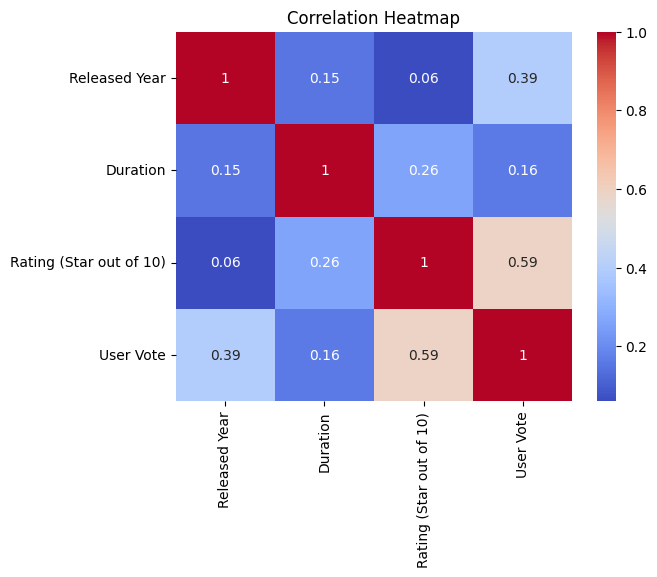

In [12]:
# Correlation Analysis (Only including numeric columns)
numeric_df = df[['Released Year', 'Duration', 'Rating (Star out of 10)', 'User Vote']].dropna()
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()